C:\Users\saira\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Text(0.5,1,'LDA vs PCA vs K- Nearest Neighbor Classifier')

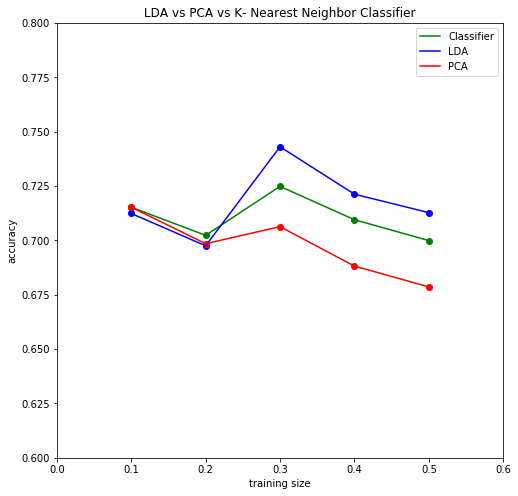

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import time

df = pd.read_csv('avila.txt')


X =df.iloc[:,0:9]
y =df.iloc[:,-1]

from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y = labelencoder_y.fit_transform(y)

accl=[]
accp =[]
acc =[]

for i in [0.10,0.20,0.30,0.40,0.50]:

    X_train ,X_test,y_train,y_test = train_test_split(X,y, test_size=i,random_state=0) 
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #Computing PCA projection
    pca = PCA(n_components=7)
    X_trainp= pca.fit(X_train).transform(X_train)
    X_testp = pca.transform(X_test)
    classifierp = KNeighborsClassifier(n_neighbors =6, metric = 'minkowski', p = 2)
    classifierp.fit(X_trainp, y_train)
    p_pred = classifierp.predict(X_testp)
    # Accuracy of PCA
    acc1 = accuracy_score(y_test, p_pred)
    accp.append(acc1)
    
    
    #Computing Linear Discriminant Analysis projection
    lda = LinearDiscriminantAnalysis(n_components=7)
    X_trainl = lda.fit(X_train, y_train).transform(X_train)
    X_testl = lda.transform(X_test)    
    classifierl = KNeighborsClassifier(n_neighbors =5, metric = 'minkowski', p = 2)
    classifierl.fit(X_trainl, y_train)
    l_pred = classifierl.predict(X_testl)
    #Accuracy of LDA
    acc2 = accuracy_score(y_test, l_pred)
    accl.append(acc2)
    
    
    #Computing Classifier
    classifier = KNeighborsClassifier(n_neighbors =7, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    #Accuracy of Classifier
    acc3 = accuracy_score(y_test, y_pred)
    acc.append(acc3)

    


    
trainsize = [0.10,0.20,0.30,0.40,0.50]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(trainsize,acc,color='green')
plt.plot(trainsize,acc,color='green',label ='Classifier')
plt.scatter(trainsize,accl,color='blue')
plt.plot(trainsize,accl,color='blue',label='LDA')
plt.scatter(trainsize,accp,color='red')
plt.plot(trainsize,accp,color='red',label = 'PCA')
plt.legend()
plt.axis([0,0.6,0.60,0.80])
plt.xlabel('training size')
plt.ylabel('accuracy')
plt.title('LDA vs PCA vs K- Nearest Neighbor Classifier')


In [22]:
print("KNN Classifier Accuracy\n", acc)
print("PCA Accuracy\n", accp)
print("LDA Accuracy\n", accl)

KNN Classifier Accuracy
 [0.7152444870565676, 0.7023010546500479, 0.7248322147651006, 0.7094918504314478, 0.6999041227229147]
PCA Accuracy
 [0.7152444870565676, 0.6984659635666347, 0.7062959411952701, 0.6881591562799616, 0.6786193672099713]
LDA Accuracy
 [0.7123681687440077, 0.6975071907957814, 0.7430488974113135, 0.7212368168744008, 0.7127516778523489]
